**classes you need to import**

In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra

# Strax header: defines which data you want to use

In [24]:
ctx = straxbra.XebraContext()
run = '00054'
peaks_data_xebra = ctx.get_array(run, 'peaks')
ncomp = ctx.get_array(run, 'n_competing')
event_basics = ctx.get_array(run, 'event_basics')

#ctx.data_info('peaks')
# ctx.data_info('n_competing')
# ctx.data_info('event_basics')

# define general parameters

In [25]:
waveform = peaks_data_xebra['data']
integral = peaks_data_xebra['area']
width = peaks_data_xebra['width'][:,5]
area_per_channel = peaks_data_xebra['area_per_channel']
#or i in range(0,50):
 #   print(area_per_channel[i])
#n_competing = peaks_data_xebra['n_competing']

full_window = [0,200]
first_peak_range = [0,20]
second_peak_range = [20,100]
local_range = [0,20]
right_limit = 8

In [26]:
# plt.hist(ncomp['n_competing'], bins=np.arange(20))

# Defining functions: Cuts, printing waveforms, parameters of a single waveform and a processing function

In [27]:
def CutCondition(integral, width, i, int_limit1, int_limit2, left_lim,ratio,time, amplitude_ratio):
#    if integral[i] > 100 and integral[i] < 1000 and width[i] > 200 and width[i] < 600 \
#     and left_lim < 10 \
    if integral[i] > 50 and integral[i] < 2000 \
    and ratio > 2 and ratio < 4 \
    and int_limit1 > 80 and int_limit1 < 2000 \
    and int_limit2 > 50 and int_limit2 < 150 \
    and ratio > 2 and ratio < 4 \
    and amplitude_ratio > 2 \
    :
        return(True)
    else:
        return(False)

In [28]:
def PrintWaveform(waveform,i, total_maximum, maximum1_index,maximum2_index,left_lim,ratio,time, right_limit, int_limit1, int_limit2):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    ax1.vlines(maximum1_index-left_lim,0, total_maximum, colors = 'k')
    ax1.vlines([maximum1_index+right_limit],0, total_maximum, colors = 'k')
#     ax1.set_xlim([0, 50])
    ax2.plot(waveform[i])
    ax2.vlines([maximum2_index-left_lim], 0, total_maximum, colors = 'c')
    ax2.vlines([maximum2_index+right_limit], 0, total_maximum, colors = 'c')
    plt.show()
    print('area of first peak: ', int_limit1)
    print('area of second peak: ', int_limit2)
    print('maximum1: ', maximum1_index)
#     print(left_border)

In [29]:
def PrintWaveform_S2(waveform, i):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    ax2.plot(waveform[i])
    plt.show()


In [30]:
def Params(waveform, i,full_window, first_peak_range, second_peak_range):
    
    window_max = waveform[i][full_window[0]: full_window[1]]
    total_maximum = max(window_max)
    selfmade_baseline = np.mean(waveform[i][195:])
    window1 = waveform[i][first_peak_range[0]: first_peak_range[1]]
    maximum1 = max(window1)
    window1 = list(window1)
    maximum1_index = window1.index(maximum1)
    left_lim = len(window1[0 : maximum1_index])
    int_limit1 = sum([selfmade_baseline + a for a in window1[maximum1_index-left_lim:maximum1_index +right_limit] ])
    window2 = waveform[i][second_peak_range[0]: second_peak_range[1]]
    maximum2 = max(window2)
    window2 = list(window2)
    maximum2_index = window2.index(maximum2)+len(window1)
    int_limit2 = sum([selfmade_baseline + b for b in window2[maximum2_index-len(window1)-left_lim:maximum2_index-len(window1) +right_limit] ])
    ratio = int_limit1/int_limit2
    time = (maximum2_index - maximum1_index)*10
    amplitude_ratio = maximum1/maximum2
    
    
    window_max = list(window_max)
    maximum1_index_global = window_max.index(maximum1)
    maximum2_index_global = window_max.index(maximum2)
    return (window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim
           ,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio, maximum1_index_global, maximum2_index_global)

In [31]:
def Sum(area_per_channel, i):
    
    PMT_sum = 0.5*sum(area_per_channel[i][1:7])
    
    return PMT_sum

In [32]:
def Process(waveform, i):
    
    window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio,maximum1_index_global, maximum2_index_global   = Params(waveform, i,full_window, first_peak_range, second_peak_range)
    SelectionCutFlag = CutCondition(integral, width, i, int_limit1, int_limit2, left_lim, ratio,time, amplitude_ratio)
    
    
    
#     integral_per_channel = area_per_channel[:,1:]

    
    
    
    
    PrintingFlag = True


    if PrintingFlag and SelectionCutFlag:
#         PrintWaveform(waveform,i, total_maximum, maximum1_index,
#                       maximum2_index,left_lim,ratio,time, right_limit, int_limit1, int_limit2)
        
        peak_ratio.append(ratio)
        time_diff.append(time)
        cut_integral.append(integral[i])
        cut_width.append(width[i])
        maximum1_index_global_list.append(maximum1_index_global)
        maximum2_index_global_list.append(maximum2_index_global)

        
        
        
        window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio, maximum1_index_global, maximum2_index_global = Params(waveform, i+1,full_window, first_peak_range, second_peak_range)
        SecondSelectionFlag = CutCondition(integral, width, i+1, int_limit1, int_limit2, left_lim, ratio,time, amplitude_ratio)
        if PrintingFlag and SecondSelectionFlag:
            if integral[i+2] > 30:
                

                PMT1_area.append(area_per_channel[i+2][1])
                PMT2_area.append(area_per_channel[i+2][2])
                PMT3_area.append(area_per_channel[i+2][3])
                PMT4_area.append(area_per_channel[i+2][4])
                PMT5_area.append(area_per_channel[i+2][5])
                PMT6_area.append(area_per_channel[i+2][6])
                PMT7_area.append(area_per_channel[i+2][7])
                

#                 print(area_per_channel[i+2])
                
                
                
                
                if  area_per_channel[i+2][1] > Sum(area_per_channel, i+2) and area_per_channel[i+2][1] > 1 :
                    PMT1_light.append(area_per_channel[i+2][1])
                if  area_per_channel[i+2][2] > Sum(area_per_channel, i+2) and area_per_channel[i+2][2] > 1 :
                    PMT2_light.append(area_per_channel[i+2][2])
                if  area_per_channel[i+2][3] > Sum(area_per_channel, i+2) and area_per_channel[i+2][3] > 1 :
                    PMT3_light.append(area_per_channel[i+2][3])
                if  area_per_channel[i+2][4] > Sum(area_per_channel, i+2) and area_per_channel[i+2][4] > 1 :
                    PMT4_light.append(area_per_channel[i+2][4])
                if  area_per_channel[i+2][5] > Sum(area_per_channel, i+2) and area_per_channel[i+2][5] > 1 :
                    PMT5_light.append(area_per_channel[i+2][5])
                if  area_per_channel[i+2][6] > Sum(area_per_channel, i+2) and area_per_channel[i+2][6] > 1 :
                    PMT6_light.append(area_per_channel[i+2][6])
                if  area_per_channel[i+2][7] > Sum(area_per_channel, i+2) and area_per_channel[i+2][7] > 1 :
                    PMT7_light.append(area_per_channel[i+2][7])
                
                
                
                
                
                
                
#                 integral_per_channel = area_per_channel[:,1:]
#                 PMT1_area_top = [item[0] for item in integral_per_channel]
#                 for i in range (0,len(area_per_channel)):
#                     sum_top_array = sum(integral_per_channel[i+2])
#                     if PMT1_area_top[i+2] > 0.3*sum_top_array and PMT1_area_top[i+2] > 1:
#                         PMT1_light.append(PMT1_area_top[i+2])
#                 PrintWaveform_S2(waveform, i+2)
#                 print('S2 width: ', width[i+2])
                S2_integral.append(integral[i+2])
                S2_width.append(width[i+2])


            
        else:
            if integral[i+1] > 30:
                #PMT0_area.append(area_per_channel[i+2][0])
                
#                 print('area_per_channel', area_per_channel[i+1])
                
                
                PMT1_area.append(area_per_channel[i+1][1])
                PMT2_area.append(area_per_channel[i+1][2])
                PMT3_area.append(area_per_channel[i+1][3])
                PMT4_area.append(area_per_channel[i+1][4])
                PMT5_area.append(area_per_channel[i+1][5])
                PMT6_area.append(area_per_channel[i+1][6])
                PMT7_area.append(area_per_channel[i+1][7])
                
                if  area_per_channel[i+1][1] > Sum(area_per_channel, i+1) and area_per_channel[i+1][1] > 1 :
                    PMT1_light.append(area_per_channel[i+1][1])
                if  area_per_channel[i+1][2] > Sum(area_per_channel, i+1) and area_per_channel[i+1][2] > 1 :
                    PMT2_light.append(area_per_channel[i+1][2])
                if  area_per_channel[i+1][3] > Sum(area_per_channel, i+1) and area_per_channel[i+1][3] > 1 :
                    PMT3_light.append(area_per_channel[i+1][3])
                if  area_per_channel[i+1][4] > Sum(area_per_channel, i+1) and area_per_channel[i+1][4] > 1 :
                    PMT4_light.append(area_per_channel[i+1][4])
                if  area_per_channel[i+1][5] > Sum(area_per_channel, i+1) and area_per_channel[i+1][5] > 1 :
                    PMT5_light.append(area_per_channel[i+1][5])
                if  area_per_channel[i+1][6] > Sum(area_per_channel, i+1) and area_per_channel[i+1][6] > 1 :
                    PMT6_light.append(area_per_channel[i+1][6])
                if  area_per_channel[i+1][7] > Sum(area_per_channel, i+1) and area_per_channel[i+1][7] > 1 :
                    PMT7_light.append(area_per_channel[i+1][7])
                
                        


#                 PrintWaveform_S2(waveform, i+1)
#                 print('S2 width: ', width[i+1])
                S2_integral.append(integral[i+1])
                S2_width.append(width[i+1])
        
        
        



        

    return()

# process your data and extract data you want to plot

In [33]:
#PMT0_light = []
PMT1_light = []
PMT2_light = []
PMT3_light = []
PMT4_light = []
PMT5_light = []
PMT6_light = []
PMT7_light = []

PMT0_area = []
PMT1_area = []
PMT2_area = []
PMT3_area = []
PMT4_area = []
PMT5_area = []
PMT6_area = []
PMT7_area = []

num_events = len(waveform)
cut_integral = []
cut_width = []
S2_integral = []
S2_width = []
peak_ratio = []
time_diff = []
maximum1_index_global_list = []
maximum2_index_global_list = []

for i in range(0,num_events):
    
    Process(waveform,i)

    


new_time_diff = [j -i for i, j in zip(maximum1_index_global_list, maximum2_index_global_list)] 

factor = 10
new_time_diff = [i * factor for i in new_time_diff]
# print(maximum1_index_global_list)
# time_diff_new = maximum1_index_global_list - maximum2_index_global_list


/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in float_scalars


# Kr83m halflife: methode 1

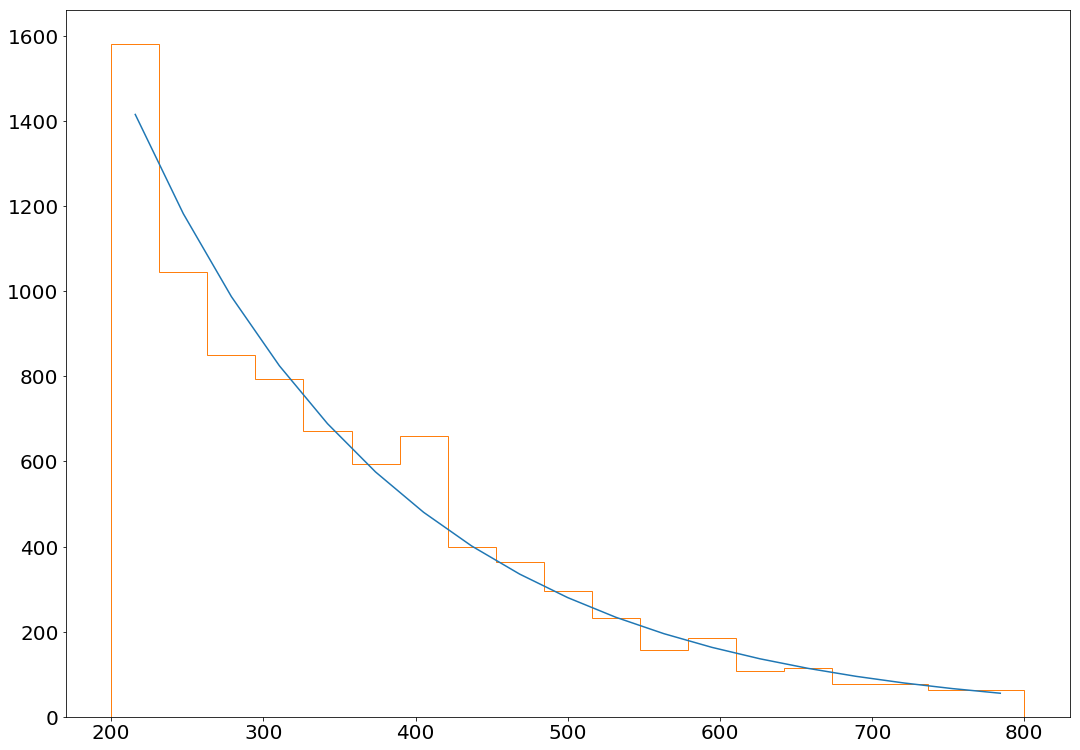

[4.84232299e+03 5.70131933e-03]
175.39799871385173


In [34]:
def expo(x, a, b):
    return a*np.exp(-b*x)

fig, ax1 = plt.subplots(sharex=False, figsize=(18, 13))
num_bins = 11
bins = np.linspace(200, 800, 20)
# binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
time_diff_hist, binEdges = np.histogram(new_time_diff, bins=bins)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov = curve_fit(expo, xdata=bincenters, ydata=time_diff_hist, p0=[20000, 0.001])



ax1.hist(new_time_diff, bins, range = [200,800], histtype='step', color='C1')
plt.plot(bincenters, expo(bincenters, *popt))
plt.show()
print(popt)
print(1/popt[1])

# Kr83m halflife: methode 2

0.0057441251337735115
174.09091492807818
0.0002676809402877884
8.112779355991446


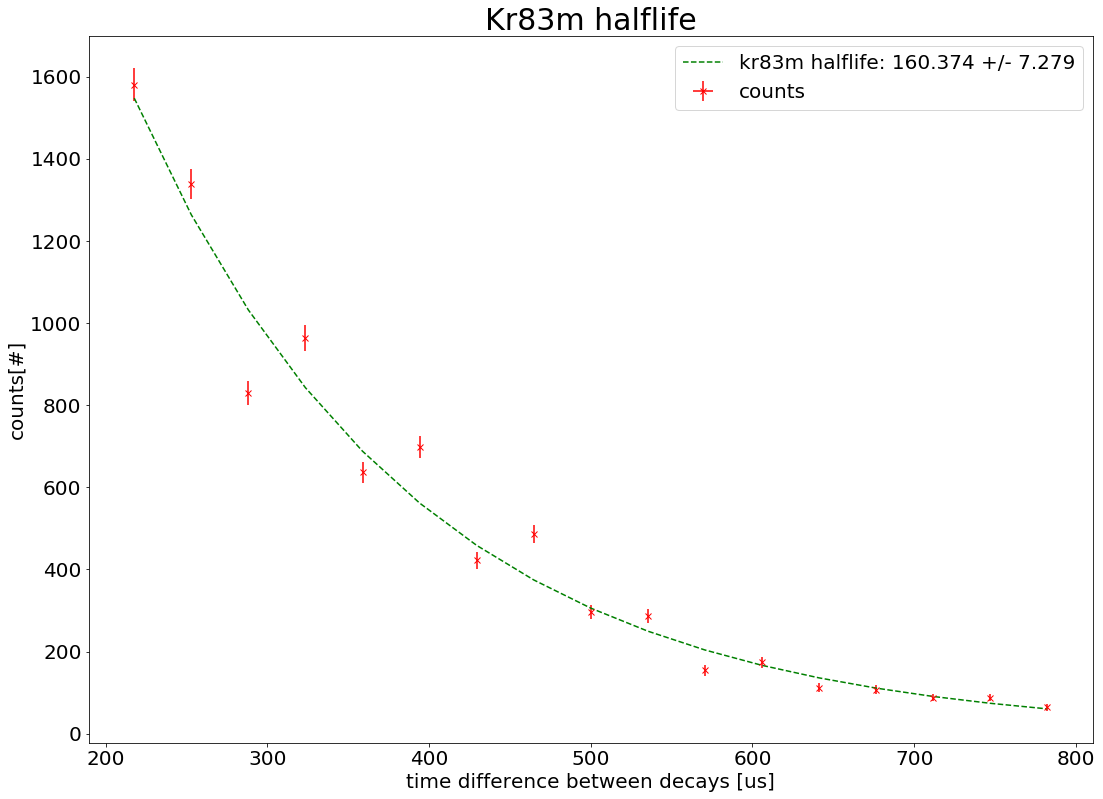

In [35]:
num_bins = 20
def expo(x, a, b):
    return a*np.exp(-b*x)

fig, ax = plt.subplots(figsize=(18,13))
n, binEdges = np.histogram(time_diff, bins=np.linspace(200,800,18))
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
p0 = [1000,0.0003]
error = np.sqrt(n)
# print(n)
# print(time_diff)
# print(len(n))
# popt, pcov = curve_fit(expo, bincenters, n, sigma=error, p0=p0, absolute_sigma=True, maxfev=10000)
popt, pcov = curve_fit(expo, bincenters, n, p0=p0, sigma=np.maximum(np.sqrt(n), np.ones_like(n)), maxfev=10000)
SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)
print(popt[1])
print(1/popt[1])
print(np.sqrt(pcov[1,1]))

error_on_lambda = np.sqrt((-1/(popt[1]**2)*(np.sqrt(pcov[1,1])))**2)
print(error_on_lambda)
plt.plot(bincenters,expo(bincenters,*popt), 'g--', label = 'kr83m halflife: 160.374 +/- 7.279')
#plt.scatter(bincenters, n, c = 'r', marker = 'x', label = "halflife in ns: {}".format(1/popt[1]))
plt.errorbar(bincenters, n, yerr=error, xerr=0, fmt = 'rx', label = 'counts' )
ax.set_title('Kr83m halflife')
ax.set_xlabel('time difference between decays [us]')
ax.set_ylabel('counts[#]')
#plt.legend(['Halflife by fit: 176 +/- 7.5 ns '],prop={'size': 20})
plt.legend(prop={'size': 20})
plt.show()



# plt.hist(time_diff, num_bins, range=[150, 800], facecolor='gray', align='mid')
# plt.show()
# plt.hist(peak_ratio, num_bins, range=[0, 6], facecolor='gray', align='mid')
# plt.show()

# Area per channel if PMT i sees x% of the sum of the top PMT array
# Opposite side PMT should have the same distribution

164


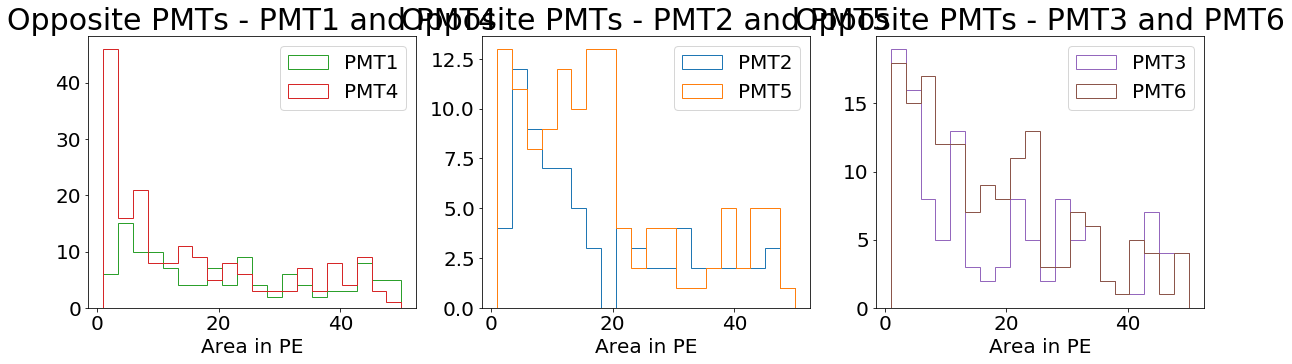

In [36]:
###################Area per channel FRACTION (% of sum of top PMT array) of opposite side PMTs#######################
print(len(PMT1_light))


num_bins = 20

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20, 5))
ax1.hist(PMT1_light, num_bins, range = [1,50], histtype='step', color='C2', label='PMT1')
ax1.hist(PMT4_light, num_bins, range = [1,50], histtype='step', color='C3', label='PMT4')
ax1.set_xlabel('Area in PE')
ax1.set_title('Opposite PMTs - PMT1 and PMT4')
ax1.legend()
#ax1.legend(prop={'size': 10})

ax2.hist(PMT2_light, num_bins, range = [1,50], histtype='step', color='C0', label='PMT2')
ax2.hist(PMT5_light, num_bins, range = [1,50], histtype='step', color='C1', label='PMT5')
ax2.set_title('Opposite PMTs - PMT2 and PMT5')
ax2.set_xlabel('Area in PE')
ax2.legend()

ax3.hist(PMT3_light, num_bins, range = [1,50], histtype='step', color='C4', label='PMT3')
ax3.hist(PMT6_light, num_bins, range = [1,50], histtype='step', color='C5', label='PMT6')
ax3.set_title('Opposite PMTs - PMT3 and PMT6')
ax3.set_xlabel('Area in PE')
ax3.legend()

plt.show()

# Area per channel for opposite side PMTs without a % cut

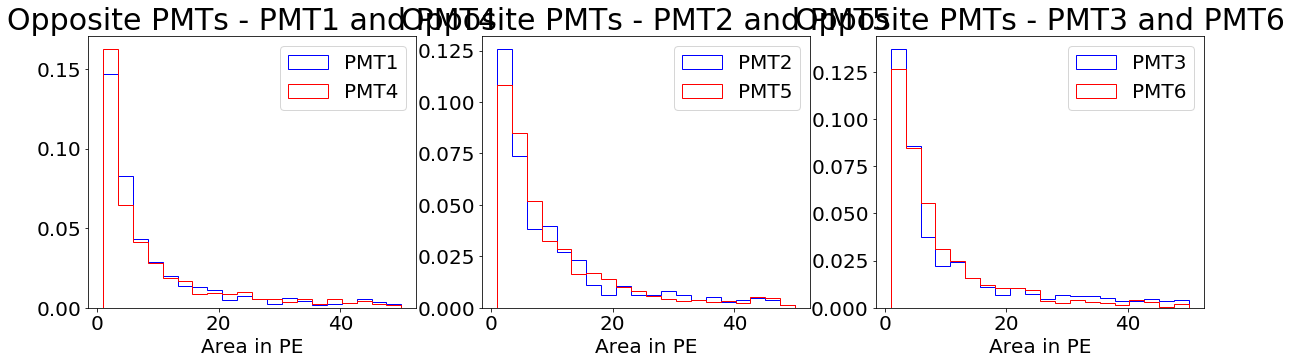

In [37]:
###################Area per channel of opposite side PMTs#######################




num_bins = 20

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20, 5))
ax1.hist(PMT1_area, num_bins, range = [1,50], density= True, histtype='step', color='blue', label='PMT1')
ax1.hist(PMT4_area, num_bins, range = [1,50], density= True, histtype='step', color='red', label='PMT4')
ax1.set_xlabel('Area in PE')
ax1.set_title('Opposite PMTs - PMT1 and PMT4')
ax1.legend()
#ax1.legend(prop={'size': 10})

ax2.hist(PMT2_area, num_bins, range = [1,50],density= True, histtype='step', color='blue', label='PMT2')
ax2.hist(PMT5_area, num_bins, range = [1,50],density= True, histtype='step', color='red', label='PMT5')
ax2.set_title('Opposite PMTs - PMT2 and PMT5')
ax2.set_xlabel('Area in PE')
ax2.legend()

ax3.hist(PMT3_area, num_bins, range = [1,50],density= True, histtype='step', color='blue', label='PMT3')
ax3.hist(PMT6_area, num_bins, range = [1,50],density= True, histtype='step', color='red', label='PMT6')
ax3.set_title('Opposite PMTs - PMT3 and PMT6')
ax3.set_xlabel('Area in PE')
ax3.legend()

plt.show()

In [38]:

# integral_per_channel = area_per_channel[:,1:]
# print(integral_per_channel[7])
# sum_top_array = sum(integral_per_channel[7])
# print(sum_top_array)
# #print(sum_top_array)
# PMT1_area_top = [item[0] for item in integral_per_channel]
# # print(PMT1_area_top)
# for i in range (0,100):
#     sum_top_array = sum(integral_per_channel[i])
#     if PMT1_area_top[i] > 0.3*sum_top_array and PMT1_area_top[i] > 1:
#         PMT1_light.append(PMT1_area_top[i])
#         print(i)

# print(PMT1_light)
# print(len(PMT1_light))   

# Plots the kr83m S1 region in a 2dhistogramm based on applied cuts 

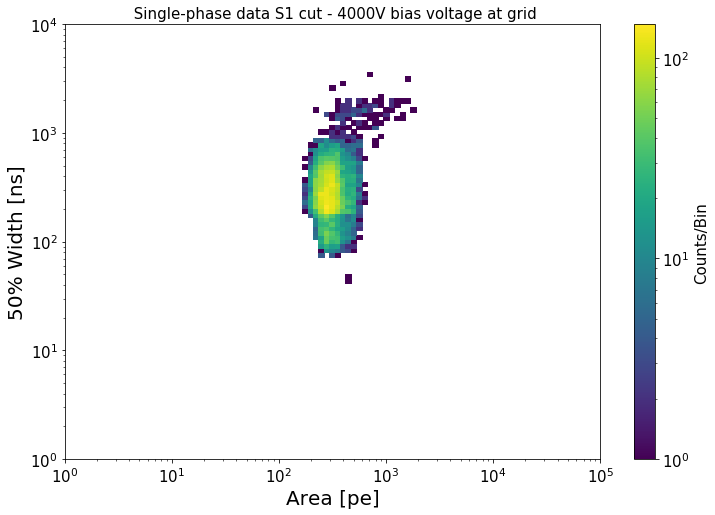

In [39]:


fig, ax = plt.subplots(figsize=(12,8))

bins_x = np.logspace(0,5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3
counts, _, _ = np.histogram2d(cut_integral, cut_width, bins=(bins_x, bins_y))
#counts, _, _ = np.histogram2d(integral, width, bins=(bins_x, bins_y))

im = ax.pcolormesh(bins_x, bins_y, counts.T, cmap='viridis', norm=mcolors.LogNorm())
ax.set_xlabel('Area [pe]', fontsize = 20)
ax.set_ylabel('50% Width [ns]', fontsize = 20)

ax.set_title(' Single-phase data S1 cut - 4000V bias voltage at grid', fontsize= 15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label ='Counts/Bin', fontsize=15)

# Plots the S2s based on the kr83m S1 selection in a 2dhistogram

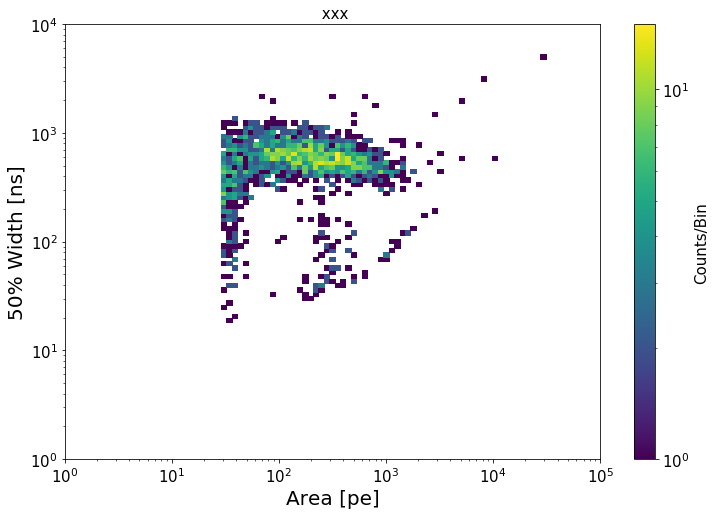

In [40]:


fig, ax = plt.subplots(figsize=(12,8))

bins_x = np.logspace(0,5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3

counts, _, _ = np.histogram2d(S2_integral, S2_width, bins=(bins_x, bins_y))

im = ax.pcolormesh(bins_x, bins_y, counts.T, cmap='viridis', norm=mcolors.LogNorm())
ax.set_xlabel('Area [pe]', fontsize = 20)
ax.set_ylabel('50% Width [ns]', fontsize = 20)

ax.set_title(' xxx', fontsize= 15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label ='Counts/Bin', fontsize=15)

# Puts the 2 plots above plus the full 2dhistogram together

8467
1783


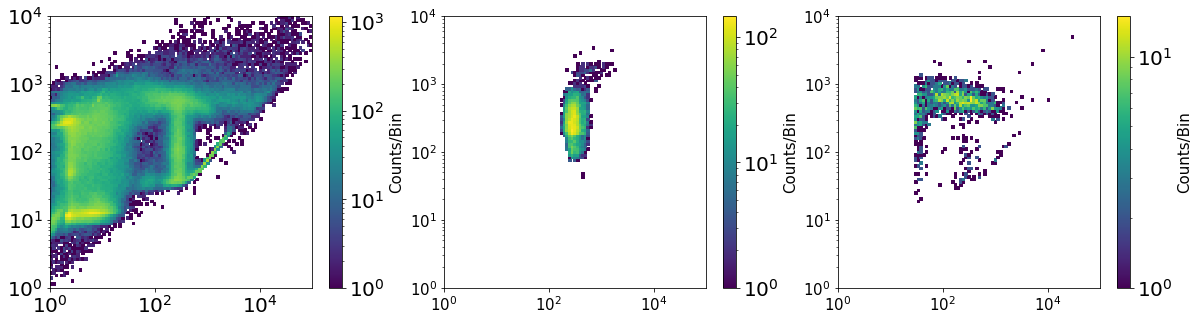

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20, 5))

bins_x = np.logspace(0,5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3

counts1, _, _ = np.histogram2d(integral, width, bins=(bins_x, bins_y))
counts2, _, _ = np.histogram2d(cut_integral, cut_width, bins=(bins_x, bins_y))
counts3, _, _ = np.histogram2d(S2_integral, S2_width, bins=(bins_x, bins_y))

im1 = ax1.pcolormesh(bins_x, bins_y, counts1.T, cmap='viridis', norm=mcolors.LogNorm())
#ax1.set_xlabel('Area [pe]', fontsize = 20)
#ax1.set_ylabel('50% Width [ns]', fontsize = 20)

#ax1.set_title(' Single-phase data S1 cut - 4000V bias voltage at grid', fontsize= 15)
#ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xscale('log')
ax1.set_yscale('log')
cbar1 = plt.colorbar(im1, ax=ax1)
#cbar1.ax1.tick_params(labelsize=15)
cbar1.set_label(label ='Counts/Bin', fontsize=15)

im2 = ax2.pcolormesh(bins_x, bins_y, counts2.T, cmap='viridis', norm=mcolors.LogNorm())
#ax2.set_xlabel('Area [pe]', fontsize = 20)
#ax2.set_ylabel('50% Width [ns]', fontsize = 20)

#ax2.set_title(' Single-phase data S1 cut - 4000V bias voltage at grid', fontsize= 15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_xscale('log')
ax2.set_yscale('log')
cbar2 = plt.colorbar(im2, ax=ax2)
#cbar2.ax2.tick_params(labelsize=15)
cbar2.set_label(label ='Counts/Bin', fontsize=15)



im3 = ax3.pcolormesh(bins_x, bins_y, counts3.T, cmap='viridis', norm=mcolors.LogNorm())

# ax3.set_xlabel('Area [pe]', fontsize = 20)
# ax3.set_ylabel('50% Width [ns]', fontsize = 20)
# ax3.set_title(' Single-phase data S1 cut - 4000V bias voltage at grid', fontsize= 15)
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_xscale('log')
ax3.set_yscale('log')
cbar3 = plt.colorbar(im3, ax=ax3)
#cbar3.ax3.tick_params(labelsize=15)
cbar3.set_label(label ='Counts/Bin', fontsize=15)
print(len(cut_integral))
print(len(S2_integral))

# fits the average width of the selected S2s

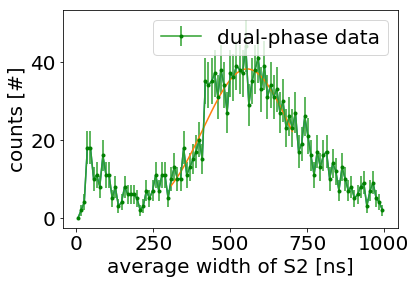

this is the average S2 width:  554.9707210817069
1783


In [42]:
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

n, binEdges = np.histogram(S2_width, bins=np.linspace(0,1000,100))
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

plt.plot(bincenters, n, '-')
p0 = [100,250,10]
# bin_mask = bincenters[20:]
# n_mask = n[20:]


bin_mask = bincenters[30:70] 
n_mask = n[30:70] 
# popt, pcov = curve_fit(single_gaus, bincenters, n, p0,  sigma=np.maximum(np.sqrt(n), np.ones_like(n)))
# plt.plot(bincenters,single_gaus(bincenters,*popt))
popt, pcov = curve_fit(single_gaus, bin_mask, n_mask, p0,  sigma=np.maximum(np.sqrt(n_mask), np.ones_like(n_mask)))
plt.plot(bin_mask,single_gaus(bin_mask,*popt))
plt.errorbar(bincenters, n, yerr=np.sqrt(n), marker= '.', mec='green', mfc= 'green', label='dual-phase data')
plt.ylabel('counts [#]')
plt.xlabel('average width of S2 [ns]')
plt.legend()
plt.show()
print('this is the average S2 width: ' ,popt[1])
print(len(S2_width))

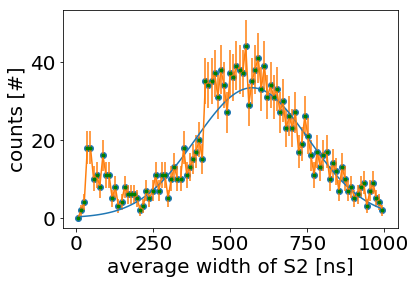

In [43]:
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

n, binEdges = np.histogram(S2_width, bins=np.linspace(0,1000,100))
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

plt.scatter(bincenters, n)
p0 = [100,250,10]
popt, pcov = curve_fit(single_gaus, bincenters, n, p0,  sigma=np.maximum(np.sqrt(n), np.ones_like(n)))
plt.plot(bincenters,single_gaus(bincenters,*popt))
plt.errorbar(bincenters, n, yerr=np.sqrt(n), marker= '.', mec='green', mfc= 'green', label='data with errorbar')
plt.ylabel('counts [#]')
plt.xlabel('average width of S2 [ns]')
plt.show()